<a href="https://colab.research.google.com/github/DM2003/PRODIGY_DS_02/blob/main/PRODIGY_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Debangan Mukherjee

In [1]:
# Task 2
# PRODIGY INTERNSHIP
# Data Cleaning and Exploratory Data Analysis on Titanic Dataset
# Data used: https://www.kaggle.com/c/titanic/data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic_data = pd.read_csv('/content/Titanic_survival_Dataset.zip')

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


According to dataset, 0 represents person did not survive and 1 represents person survived.

In [6]:
titanic_data.shape

(891, 12)

Thus, there are 891 rows and 12 columns

In [7]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Thus, there are 177 missing values in Age column, 687 missing values in Cabin and 2 missing values in Embarked column.

In [12]:
# Removing the Cabin column as majority of the values are missing
titanic_data = titanic_data.drop(columns = 'Cabin', axis=1)

<ipython-input-14-a68ea4fb9099>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

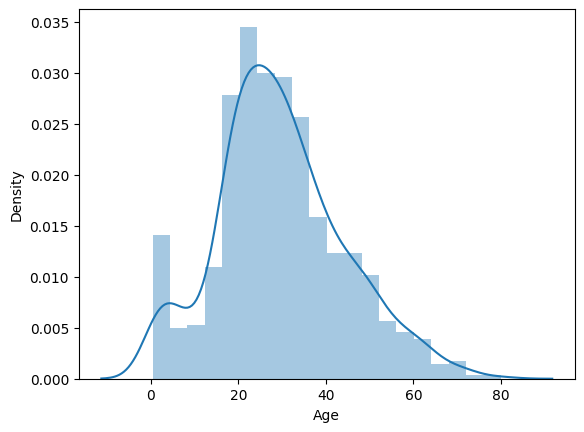

In [14]:
sns.distplot(titanic_data['Age'])

In [15]:
# For the age column, only a fraction of the values are missing, hence we cannot just drop the entire age column
# Thus, we will use the imputation method ie: replacing the missing values with mean of the column
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True)

In [17]:
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [18]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace = True)

In [19]:
# Checking the no of missing values again
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Thus, now we can see there are no missing values.

Thus, our data has been cleaned of outliers and missing values.

In [20]:
# Data Analysis
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
# Finding no of people who survived and who did not
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Thus, 549 people did not survive and 342 survived.

In [23]:
# Data visualization
sns.set()

In [25]:
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

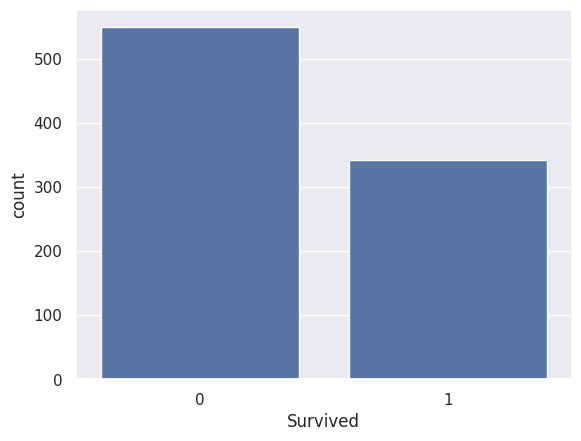

In [26]:
# Creating  a countplot for survived column as shown above
# countplot will take 2 parameters as args ie: the x axis data and the dataset on which it will work
sns.countplot(x = 'Survived', data = titanic_data)

In [28]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

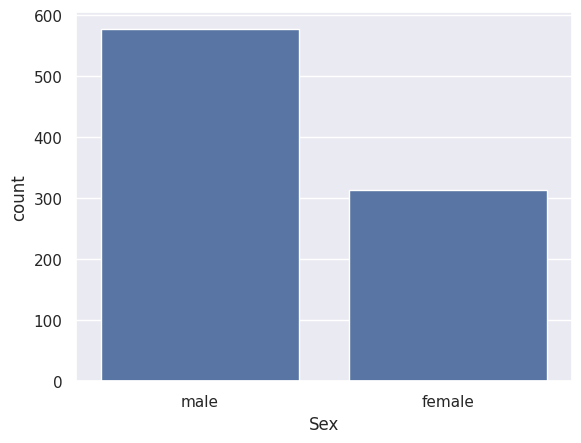

In [29]:
# Creating a countplot for "Sex" column as shown above
sns.countplot(x = 'Sex', data = titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

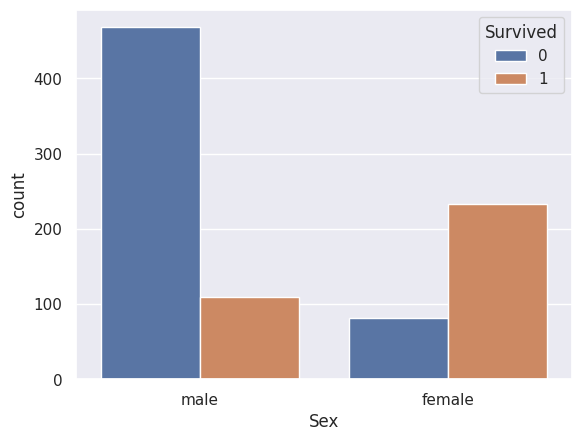

In [30]:
# No of survived passengers based on Sex
sns.countplot(x= 'Sex', hue = 'Survived', data = titanic_data)

Thus, it is clear that females survived were more in comparison to male counterparts.

<Axes: xlabel='Pclass', ylabel='count'>

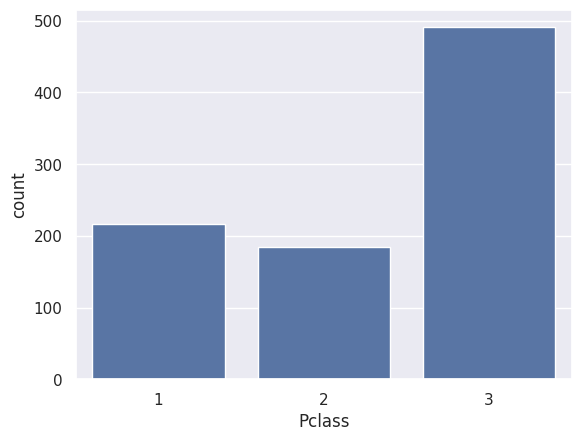

In [31]:
# Creating a countplot for pClass column
sns.countplot(x = 'Pclass', data = titanic_data)

Thus, there are more people in 3rd class as compared to first and second class.

<Axes: xlabel='Pclass', ylabel='count'>

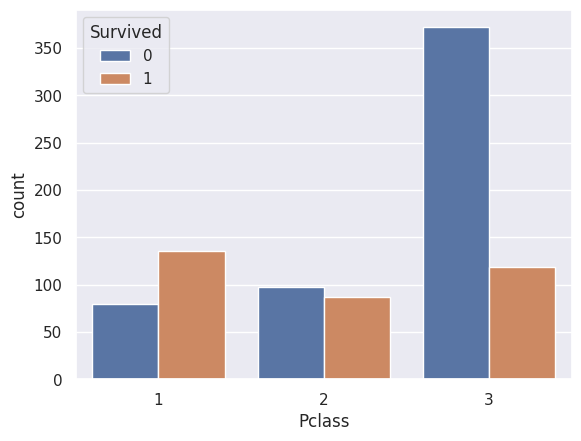

In [32]:
# No of people survived based on Pclass
sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic_data)

Thus, 1st class passengers were given more importance at the time of survival.

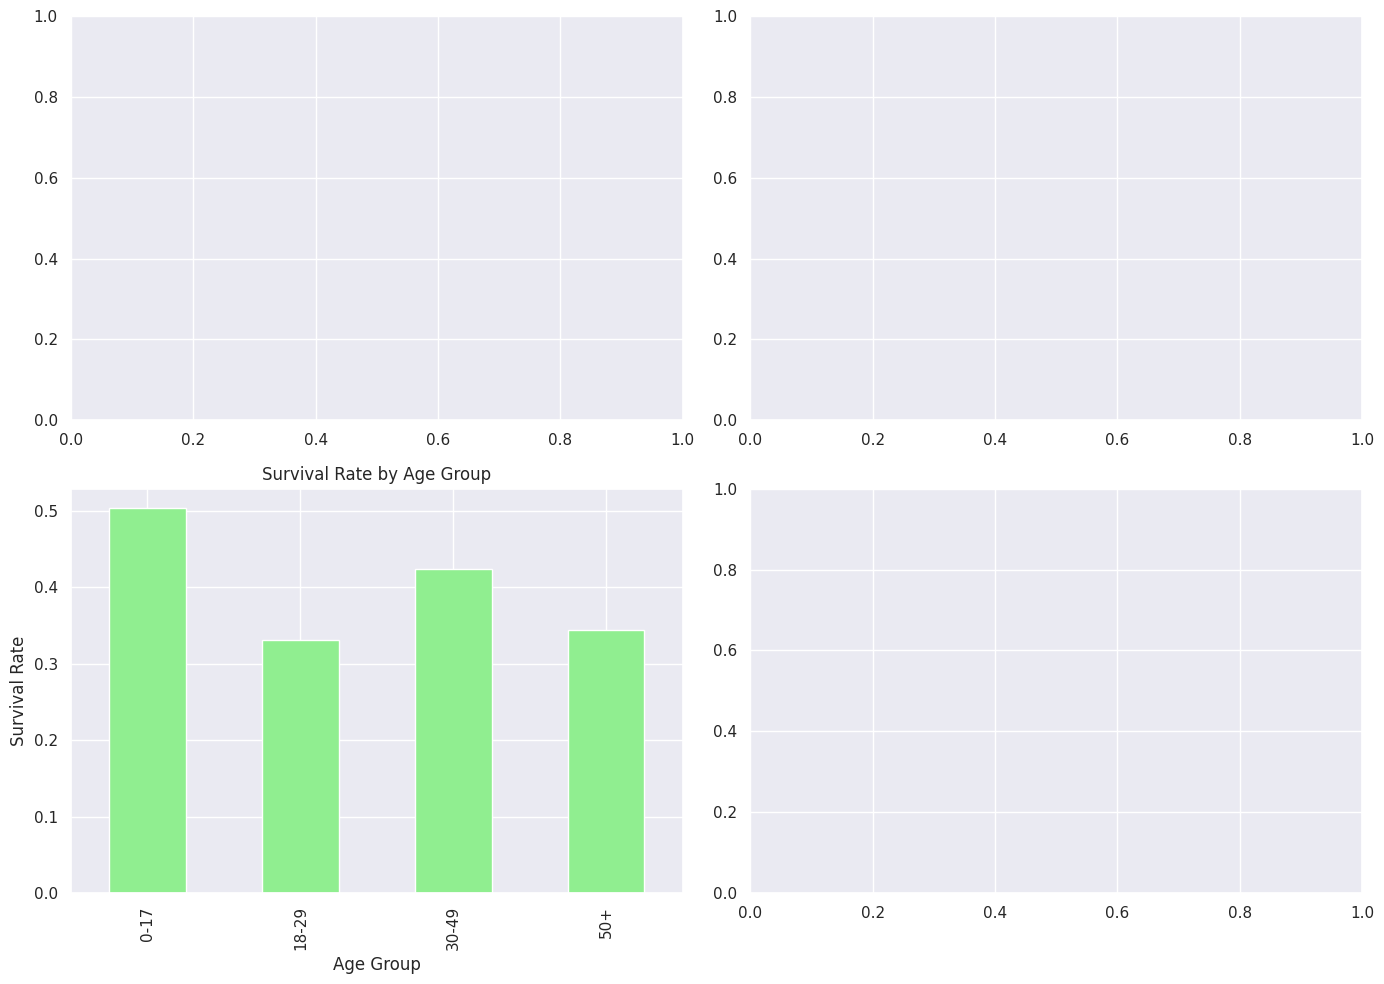

In [34]:
# Survival Rate by Age Group
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
bins = [0, 18, 30, 50, 100]
labels = ['0-17', '18-29', '30-49', '50+']
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins, labels=labels)
age_survival = titanic_data.groupby('AgeGroup')['Survived'].mean()
age_survival.plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Survival Rate by Age Group')
axes[1, 0].set_ylabel('Survival Rate')
axes[1, 0].set_xlabel('Age Group')
plt.tight_layout()
plt.show()

In [38]:
# Calculating Family size
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']

In [39]:
# Plotting survival rate by family size
survival_by_family_size = titanic_data.groupby('FamilySize')['Survived'].mean()

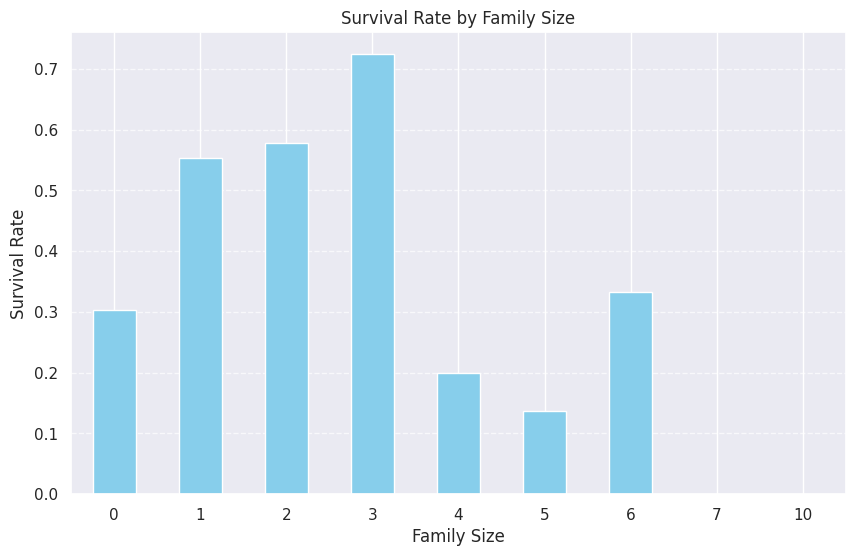

In [40]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
survival_by_family_size.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Thus, medium family size (almost close enough to 3) were given more importance at the time of survival.

In [45]:
# Plotting survival rate by port of embarkation
survival_by_embarkation = titanic_data.groupby('Embarked')['Survived'].mean()

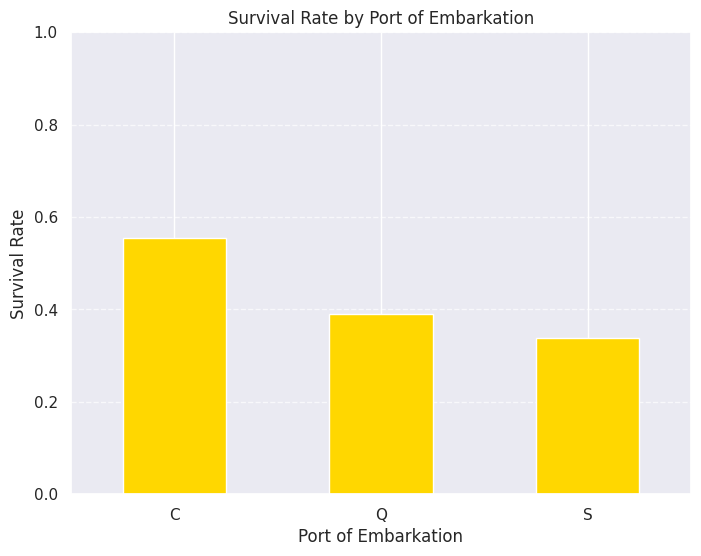

In [46]:
# Plotting the bar chart
plt.figure(figsize=(8, 6))
survival_by_embarkation.plot(kind='bar', color='gold')
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Thus, passengers from Cherbourg were given most priority and passengers from Sothampton were given the least priority.

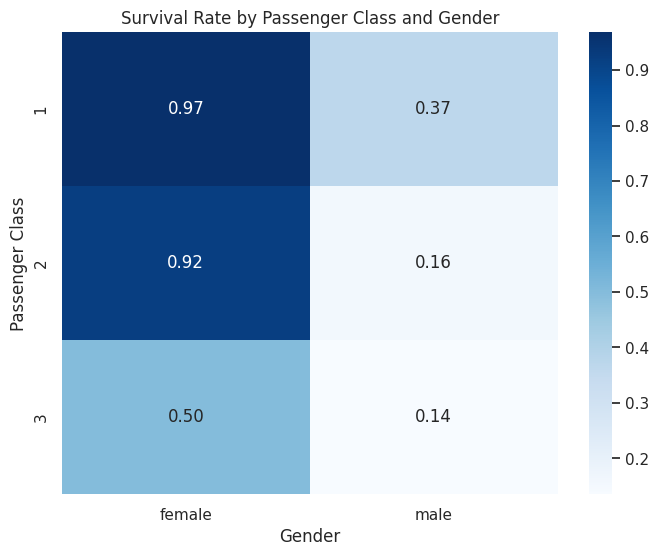

In [48]:
# Survival Rate Heatmap by Passenger Class and Gender
class_gender_survival = titanic_data.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
plt.figure(figsize=(8, 6))
sns.heatmap(class_gender_survival, annot=True, cmap='Blues', fmt=".2f")
plt.title('Survival Rate by Passenger Class and Gender')
plt.ylabel('Passenger Class')
plt.xlabel('Gender')
plt.show()

Thus it suggests that female passengers from 1st class had highest survival rate while male passengers from 3rd class had least survival rate.

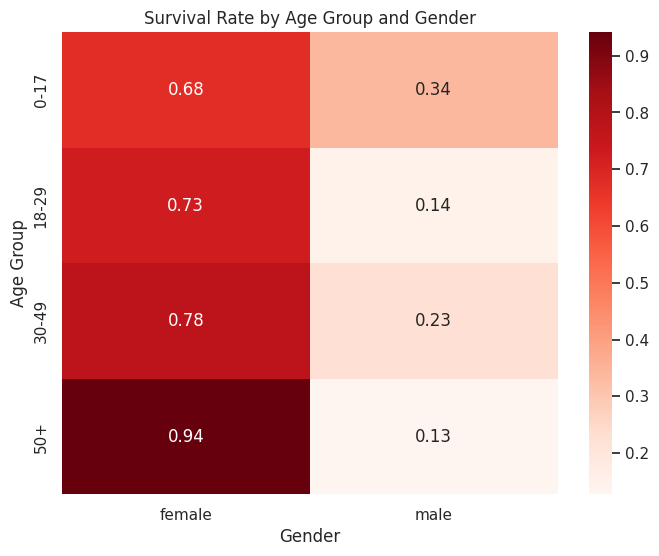

In [50]:
# Survival Rate Heatmap by Age Group and Gender
bins = [0, 18, 30, 50, 100]
labels = ['0-17', '18-29', '30-49', '50+']
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins, labels=labels)
age_gender_survival = titanic_data.groupby(['AgeGroup', 'Sex'])['Survived'].mean().unstack()
plt.figure(figsize=(8, 6))
sns.heatmap(age_gender_survival, annot=True, cmap='Reds', fmt=".2f")
plt.title('Survival Rate by Age Group and Gender')
plt.ylabel('Age Group')
plt.xlabel('Gender')
plt.show()

This heatmap suggests that females of age group greater than 50 were given more importance at the time of survival while males of age group greater than 50 were given least importance at the time of survival.

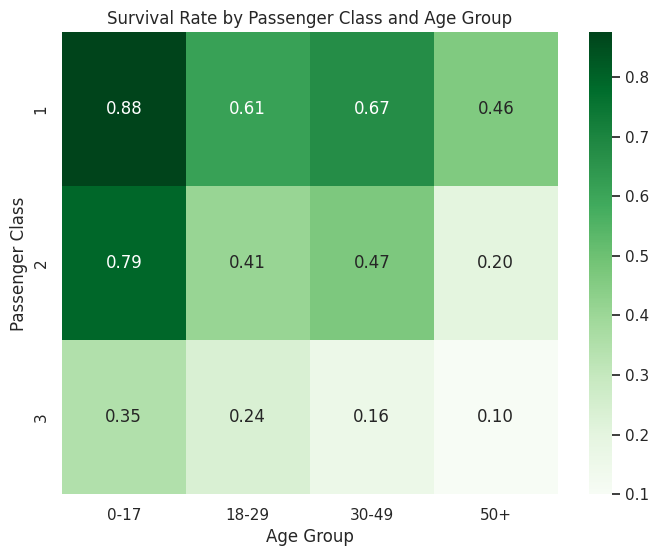

In [51]:
# Survival Rate Heatmap by Passenger Class and Age Group
class_age_survival = titanic_data.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().unstack()
plt.figure(figsize=(8, 6))
sns.heatmap(class_age_survival, annot=True, cmap='Greens', fmt=".2f")
plt.title('Survival Rate by Passenger Class and Age Group')
plt.ylabel('Passenger Class')
plt.xlabel('Age Group')
plt.show()

Thus, it suggests that age group 0-17 of 1st passenger class were given more importance at the time of survival while age group 50+ of 3rd passenger class were given least importance.

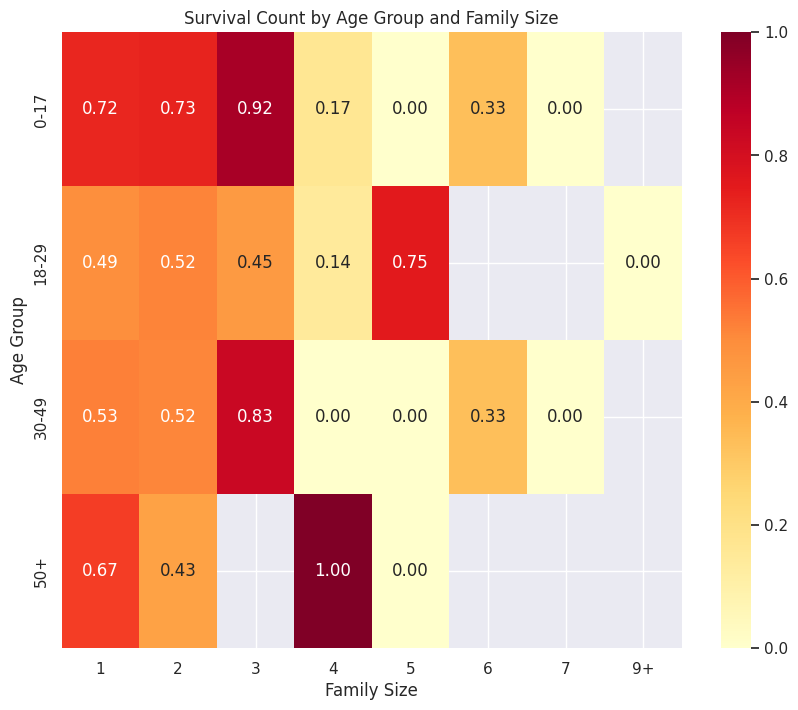

In [52]:
# Survival Count Heatmap by Age Group and Family Size
family_size_bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 11]
family_size_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9+']
titanic_data['FamilySizeGroup'] = pd.cut(titanic_data['FamilySize'], bins=family_size_bins, labels=family_size_labels)
age_family_size_survival = titanic_data.pivot_table(index='AgeGroup', columns='FamilySizeGroup', values='Survived', aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(age_family_size_survival, annot=True, cmap='YlOrRd', fmt=".2f")
plt.title('Survival Count by Age Group and Family Size')
plt.ylabel('Age Group')
plt.xlabel('Family Size')
plt.show()

Thus, it is clear that family size 4 of age group 50+ were preferred the most.

Hence, we have thoroughly cleaned our dataset and performed EDA to discover underlying trends and patterns in data.